# PS.1 (conditioning)

Consider subtraction and division as bivariate functions, i.e., 

\begin{align*}
f & :\mathbb{R}^2\rightarrow \mathbb{R} & (x_1,x_2)&\mapsto x_1-x_2\\
g & :\mathbb{R}\times \mathbb{R}_*\rightarrow \mathbb{R} & (x_1,x_2)&\mapsto \frac{x_1}{x_2}
\end{align*}

a) Determine the conditioning of $f$ with respect to the sum norm. 
\begin{align*}
f^{'}(x) & = (1, -1) \\
\\
\kappa^{abs}_{f} & = \Vert f^{'}(x) \Vert_{1} = 0
\end{align*}
b) Determine the partial conditioning of $f$.
\begin{align*}
\partial_{x_1}{f} & = 1;\ \partial_{x_2}{f} = -1 \\
\\
\kappa^{x_1}_{f} & = \frac{|x_1|}{|x_1 - x_2|};\ \kappa^{x_2}_{f} = -\frac{|x_2|}{|x_1 - x_2|} \\
\\
\hat{\kappa}_{f} & = \frac{|x_{1} - x_{2}|}{|x_1 - x_2|} = 1
\end{align*}
c) Is $g$ partially well-conditioned?
\begin{align*}
\partial_{x_1}{f} & = \frac{1}{x_2};\ \partial_{x_2}{f} = -\frac{x_1}{x_{2}^{2}} \\
\\
\kappa^{x_1}_{f} & = |\frac{1}{x_2}|\frac{|x_1|}{|\frac{x_1}{x_2}|};\ \kappa^{x_2}_{f} = |\frac{x_1}{x_{2}^{2}}|\frac{|x_2|}{|\frac{x_1}{x_2}|} \\
\\
\hat{\kappa}_{f} & = \frac{|x_1*x_2|}{|x_1*x_2|} + \frac{|x_1*x_2^2|}{|x_1*x_2^2|} = 2 \\
\\
                 & \Rightarrow g\ is\ partially\ well\ conditioned
\end{align*}

# PS.1 (evaluating polynomials)

We are given the polynomial 

\begin{equation*}
f(x,y) = 4x^4 - y^4 + 2y^2
\end{equation*}

a) Evaluate $f$ at $(x,y)=(13860.0,19601.0)$ in julia. 

b) There could be rounding errors. What is the exact value of $f(13860.0,19601.0)$? 

$$f(x,y) = 4 * 13860^4 - 19601^4 + 2 * 19601^2 = 1$$

c) Provide a lower bound on $\hat{\kappa}_f(13860,19601)$.

\begin{align*}
\partial_{x}{f} & = 16x^3;\ \partial_{y}{f} = 4y - 4y^3 \\
\\
\kappa^{x}_{f} & = |16x^3| \frac{|x|}{|4x^4 - y^4 + 2y^2|};\ \kappa^{y}_{f} = |4y - 4y^3| \frac{|y|}{|4x^4 - y^4 + 2y^2|} \\
\\
\hat{\kappa}_f & = \kappa^{x}_{f} + \kappa^{y}_{f} \\
\\
               &  = |16x^3| \frac{|x|}{|4x^4 - y^4 + 2y^2|} + |4y - 4y^3| \frac{|y|}{|4x^4 - y^4 + 2y^2|} \\
\\
               & = \frac{|16x^4 + 4y^2 - 4y^4|}{|4x^4 - y^4 + 2y^2|} \\
\\
               & = \frac{4*|4x^4 - y^4 + y^2|}{|4x^4 - y^4 + 2y^2|} \gt \frac{4*|4x^4 - y^4 + 2y^2|}{|4x^4 - y^4 + 2y^2|} = 4
\end{align*}

In [130]:
function f(x,y)      # or simply define f(x,y) = 4x^4-y^4+2y^2
    4x^4-y^4+2y^2
end
x = 13860.0
y = 19601.0

f(x,y)

2.0

# PS.1 (ill-conditioned deblurring) 

For $x\in\mathbb{R}^n$, you only observe 
\begin{equation*}
y = A x,\qquad A=\frac{1}{9}\begin{pmatrix}
3&2 &1 &0&\cdots&0\\
2&3&\ddots&\ddots&&\vdots\\
1&\ddots&\ddots&\ddots&\ddots&0\\
0&\ddots&\ddots&\ddots&\ddots&1\\
\vdots & &\ddots&\ddots&3&2\\
0 &\cdots &0&1&2&3
\end{pmatrix}.
\end{equation*}

a) Write a function constr_A(n) that builds $A$ provided that $n\geq 5$.

b) For fixed $n$ and a suitable signal $x\in\mathbb{R}^n$, compute $A$ and plot $y=A x$.

c) Add independent, identically distributed Gaussian noise $\varepsilon\in\mathbb{R}^n$ to $y$, i.e.,
$$
\tilde{y} = y+\varepsilon
$$
and reconstruct $A^{-1}\tilde{y}$. Plot $A^{-1}y$ and $A^{-1}\tilde{y}$ for different noise intensities.

d) Plot $\|A^{-1}\|_1$ against $n$ for $5\leq n\leq 100$.

opnorm(inv(A), 1) = 502002.00000005384


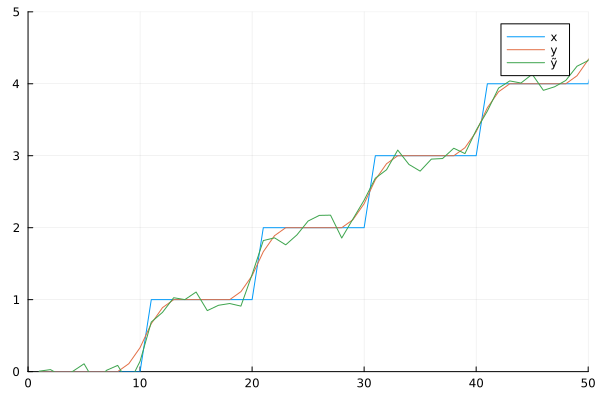

In [29]:
using LinearAlgebra, Plots, Random, LaTeXStrings

n = 1000
x = floor.(range(0,n/10,n))

function constr_A(n)
    if n < 5
        println("cannot conctruct A for n < 5")
        
    else
        A = zeros(Float64, n, n)
        for k = 0:2
            A[diagind(A, k)] .= (3 - k) / 9
            A[diagind(A, -k - 1)] .= (3 - k - 1) / 9
        end
        
        return A
    end
end

A = constr_A(n)
@show opnorm(inv(A),1)

y = A * x
Random.seed!(1)
ε = 0.1*randn(n)
ỹ = y + ε
plot(x,label="x",xlimits=[0;50],ylimits=[0;5])
plot!(y,label="y",xlimits=[0;50],ylimits=[0;5])
plot!(ỹ,label="ỹ")

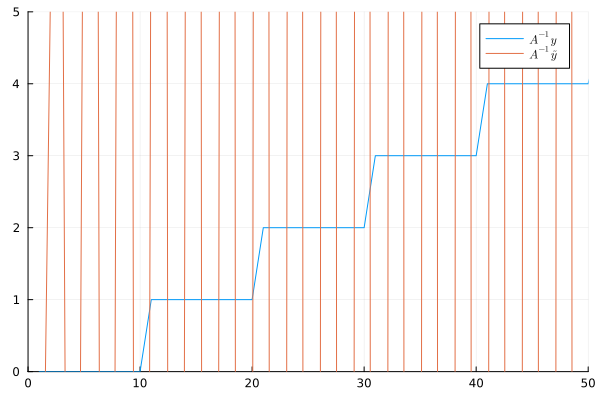

In [25]:
plot(inv(A) * y,label=L"A^{-1}y",xlimits=[0;50],ylimits=[0;5])
plot!(inv(A) * ỹ,label=L"A^{-1}\tilde{y}",xlimits=[0;50],ylimits=[0;5])

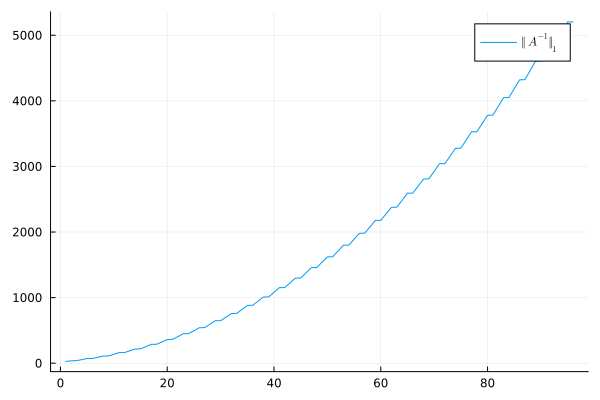

In [27]:
plot(
    [opnorm(inv(constr_A(n)), 1) for n in 5:100], 
    label = L"\Vert A^{-1} \Vert_{1}"
)

# PS.1 ($32$-bit system)
    
Consider the following $32$-bit System: 

- sign: $1$ bit

- exponent: $8$ bits

- significant digits: $23$ bits


a) Determine $\mathbb{F}_{32}$, $\mathbb{F}_{32,sub}$, $r_{32}$, and $R_{32}$.

$R_{32}$ is the largest representable number in a given representation. Since the largest exponent is always reserverd for special use (e.g. to represent Inf) the largest representable number is a single precision step smaller than this value. This precision step is a function of the exponent $\alpha$ and the available mantissa bits (see below for more explanation).

\begin{align*}
\mathbb{F}_{32} & = \{\pm(1,a_1,...,a_{23})*2^{\alpha} : a_k \in \{0, 1\}, \alpha \in \{-126,...,127\}\} \\
\\
R_{32} & = 2^{128} - \frac{2^{128} - 2^{127}}{2^{23}} = 2^{128} - \frac{2^{127}}{2^{23}} = 2^{128}*(1 - 2^{-24}) \\
\\
r_{32} & = 2^{-126} \\
\\
\mathbb{F}_{32,sub} & = \{\pm k * 2^{-149} : k = 1,...,2^{23}-1\}
\end{align*}

b) Provide $3$ positive integers that are smaller than $R_{32}$ but not contained in $\mathbb{F}_{32}$.
Numbers representable in Float32 are determined by the given precision (i.e. spacing relative to the exponent $\alpha$) which can be calculated as

$$p_{\alpha} = \frac{2^{\alpha} - 2^{\alpha - 1}}{2^{n}}$$

where $n$ is the number of significant bits (mantissa). Therefore, positive integers up to $\alpha = 24$ can be represented exactly in Float32. However for positive integers larger $2^24$ representability depends on their relative position on the number line e.g. for an exponent of $\alpha = 25$

$$p_{\alpha} = \frac{2^{25} - 2^{24}}{2^{23}} = 2$$

which means that only every second integer in this range can be represented exactly. Starting from the lowest representable positive integer in this range $x = 2^24 = 16777216$ we see that $x + 1 = 16777217$ is rounded down to $x = 16777216$. Only $x + 2 = 16777218$ is represented again and so on. Using this result we pick the first three odd numbers in this range which are 16777217, 16777219 and 16777221 and look at there Float32 representation to illustrate as required for c).

c) Illustrate and verify your theoretical findings in a) and b) by julia.

In [231]:
# special value mantissa all 0 exponent all 1 = inf
Float32(2.0^128)

Inf32

In [240]:
#subtracting a precision step give R_32
Float32(2.0^128 * (1 - 2^-24))

3.4028235f38

In [219]:
for k = 0:4
    println("Integer: ", 2^24 + k, "; Float32: ", Float32(2^24 + k))
end

Integer: 16777216; Float32: 1.6777216e7
Integer: 16777217; Float32: 1.6777216e7
Integer: 16777218; Float32: 1.6777218e7
Integer: 16777219; Float32: 1.677722e7
Integer: 16777220; Float32: 1.677722e7


In [6]:
# jupyter nbconvert --no-input --to latex PS_1.ipynb